In [68]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from seaborn.utils import load_dataset
%matplotlib inline
from sklearn.preprocessing import StandardScaler
#pd.set_option('display.max_columns', 500)

In [69]:
df= pd.read_csv("SpotifyFeatures.csv") 
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [70]:
#To check null values
pd.isnull(df).sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [72]:
sorted_df = df.sort_values('popularity', ascending = False).head(10)
sorted_df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
9027,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
107804,Pop,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
86951,Rap,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
107803,Pop,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
107802,Pop,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
9026,Dance,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
66643,Hip-Hop,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,193227,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656
107909,Pop,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,193227,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656
138918,Reggaeton,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,193227,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656
107829,Pop,Ava Max,Sweet but Psycho,25sgk305KZfyuqVBQIahim,97,0.0691,0.719,187436,0.704,0.000000,C#,0.1660,-4.724,Major,0.0476,133.002,4/4,0.628


In [73]:
# To check the shortest songs in terms of duration(ms)
sorted_df = df.sort_values('duration_ms', ascending = True).head()
sorted_df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
76990,Children's Music,Neva Eder,Pat-a-cake,3WD0pKwRzP3cIlLu5upr0n,0,0.509,0.766,15387,0.538,0.000001,A#,0.131,-15.830,Major,0.880,92.912,4/4,0.000
123625,Classical,George Frideric Handel,"Rinaldo, HWV 7a, Act I (Ed. G. Sechi): Questi ...",6TLQnTsEA4dC2tnrw90oXj,0,0.969,0.562,15509,0.125,0.001380,B,0.373,-15.449,Minor,0.201,115.827,5/4,0.574
104391,Classical,Johann Sebastian Bach,"St. John Passion, BWV 245, Pt. 2: No. 25c, Pil...",59WZFyp8hKSPBCc9rG8Ooa,0,0.914,0.588,16316,0.165,0.000000,D,0.233,-26.286,Major,0.237,104.678,4/4,0.000
152791,R&B,Solange,S McGregor (interlude),6vOnTS8EhcUqvaRwsV2Dfn,20,0.922,0.422,16640,0.321,0.000003,C,0.179,-15.381,Major,0.304,176.961,5/4,0.361
77783,Children’s Music,Solange,S McGregor (interlude),6vOnTS8EhcUqvaRwsV2Dfn,18,0.922,0.422,16640,0.321,0.000003,C,0.179,-15.381,Major,0.304,176.961,5/4,0.361


In [74]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,232725.0,41.127502,18.189948,0.00000,29.0000,43.000000,55.0000,100.000
acousticness,232725.0,0.368560,0.354768,0.00000,0.0376,0.232000,0.7220,0.996
danceability,232725.0,0.554364,0.185608,0.05690,0.4350,0.571000,0.6920,0.989
duration_ms,232725.0,235122.339306,118935.909299,15387.00000,182857.0000,220427.000000,265768.0000,5552917.000
energy,232725.0,0.570958,0.263456,0.00002,0.3850,0.605000,0.7870,0.999
instrumentalness,232725.0,0.148301,0.302768,0.00000,0.0000,0.000044,0.0358,0.999
liveness,232725.0,0.215009,0.198273,0.00967,0.0974,0.128000,0.2640,1.000
loudness,232725.0,-9.569885,5.998204,-52.45700,-11.7710,-7.762000,-5.5010,3.744
speechiness,232725.0,0.120765,0.185518,0.02220,0.0367,0.050100,0.1050,0.967
tempo,232725.0,117.666585,30.898907,30.37900,92.9590,115.778000,139.0540,242.903


In [75]:
#checking the songs with energy higher than 0.5 and less than 0.9
high_energy_songs = df.query("0.9>energy>0.5 ", inplace = False).sort_values("energy", ascending = False)
high_energy_songs[:2]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
208869,World,Planetshakers,Come Right Now - Live,4kt7u5h9PpywiyhoG38tHL,50,0.000108,0.523,228342,0.899,0.00143,F,0.713,-8.220,Minor,0.121,128.075,4/4,0.439
171657,Comedy,Eddie Griffin,Viagra,27zuzT1mJFptPWbMtdVqCt,20,0.868000,0.451,496560,0.899,0.00000,C#,0.695,-7.268,Major,0.937,79.734,3/4,0.156


In [128]:
popular_songs = df.query("popularity>95 ", inplace = False).sort_values("popularity", ascending = False)
popular_songs[:5]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
107804,Pop,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
9027,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
9026,Dance,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
86951,Rap,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
107802,Pop,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335


In [77]:
#To find the names of most popular artists
artist_name_df = popular_songs.sort_values("popularity", ascending = False)
artist_name_df[['artist_name', 'popularity']][:10]

,artist_name,popularity
107804,Ariana Grande,100
9027,Ariana Grande,100
9026,Ariana Grande,99
86951,Post Malone,99
107802,Ariana Grande,99
107803,Post Malone,99
138918,Daddy Yankee,98
66643,Daddy Yankee,98
107909,Daddy Yankee,98
107806,Post Malone,97


In [78]:
#To check the name of artist at any specific row
df[["artist_name"]].iloc[10]

artist_name    Leopold Stokowski
Name: 10, dtype: object

In [129]:
#converting duration of songs from milli seconds into seconds
df["duration"] = df["duration_ms"].apply(lambda x : round(x/1000))
df.drop("duration_ms", inplace = True, axis = 1)
df.duration.tail()

232720    326
232721    282
232722    167
232723    222
232724    323
Name: duration, dtype: int64

[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'acousticness'),
 Text(2.5, 0, 'danceability'),
 Text(3.5, 0, 'energy'),
 Text(4.5, 0, 'instrumentalness'),
 Text(5.5, 0, 'liveness'),
 Text(6.5, 0, 'loudness'),
 Text(7.5, 0, 'speechiness'),
 Text(8.5, 0, 'tempo'),
 Text(9.5, 0, 'valence'),
 Text(10.5, 0, 'duration')]

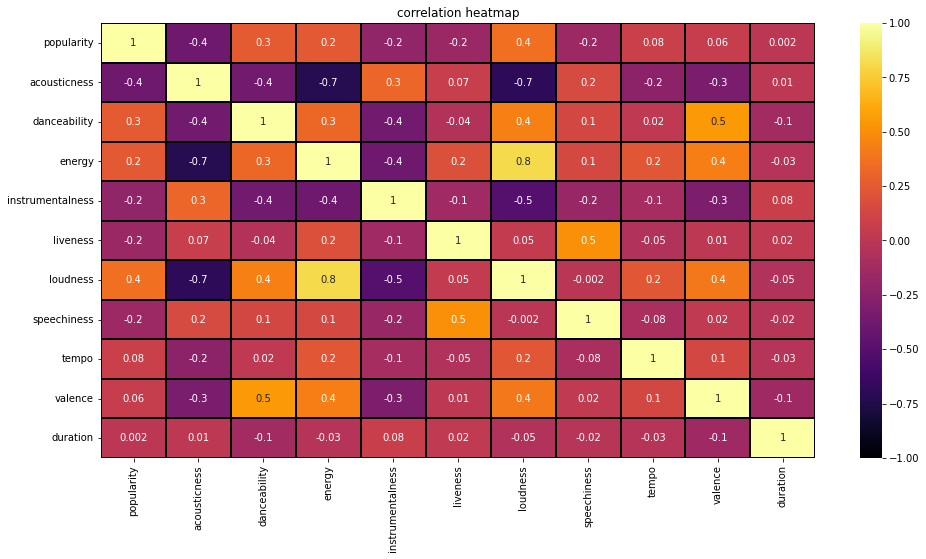

In [80]:
#correlation map
corr_df = df.drop(['key', 'mode'], axis = 1).corr(method = "pearson")
plt.figure(figsize=(16,8))
heatmap = sns.heatmap(corr_df, annot=True, fmt= ".1g", vmin =-1, vmax= 1, center = 0, cmap = "inferno", linewidths = 1, linecolor="Black")
heatmap.set_title("correlation heatmap")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

In [132]:
# The 5 percent of my whole dataset
sample_df = df.sample(int(0.05*len(df)))
print(len(sample_df))

11636


Text(0.5, 1.0, 'loudness vs energy correlation graph')

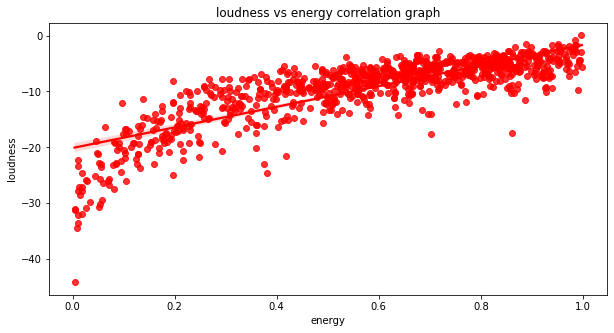

In [82]:
# Showing the relation between various parameters
plt.figure(figsize=(10,5))
sns.regplot(data = sample_df, y = "loudness", x = "energy", color = "r").set_title("loudness vs energy correlation graph")

In [83]:
data = df.sort_values("genre").head(2)
data

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration
644,A Capella,Hyannis Sound,Absolutely (Story of a Girl),4cDYqCte9iuEweE5fCwtaP,1,0.575,0.616,0.569,0.0,G,0.0833,-6.090,Major,0.0583,100.906,4/4,0.717,164
583,A Capella,Glad,O Sacred Head Now Wounded,4T0MhF3l1r8GGjVu9D68LG,10,0.793,0.315,0.187,0.0,B,0.2250,-9.709,Minor,0.0284,80.885,4/4,0.190,168


In [133]:
# Accessing only a particular genre
df[df["genre"]== "Pop"]


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration
107802,Pop,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335,190
107803,Pop,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385,150
107804,Pop,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319,179
107805,Pop,J. Cole,MIDDLE CHILD,2JvzF1RMd7lE3KmFlsyZD8,96,0.1490,0.837,0.364,0.000000,G#,0.2710,-11.713,Major,0.2760,123.984,4/4,0.463,214
107806,Pop,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,3KkXRkHbMCARz0aVfEt68P,97,0.5560,0.760,0.479,0.000000,D,0.0703,-5.574,Major,0.0466,89.911,4/4,0.913,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152257,Pop,The Chainsmokers,Don't Let Me Down (feat. Daya),0w75KG0DuLDi6tdHmEMovD,63,0.1900,0.534,0.868,0.003180,B,0.1480,-5.057,Major,0.2060,159.757,4/4,0.406,209
152258,Pop,Frankie Valli & The Four Seasons,Sherry,0NpvdCO506uO58D4AbKzki,60,0.6260,0.703,0.478,0.000000,G,0.1130,-8.062,Major,0.0441,117.562,4/4,0.734,152
152259,Pop,Tank,F***in Wit Me,3v10vlZlZPApvDz3kE4aNe,55,0.2980,0.364,0.537,0.000000,F#,0.1910,-5.912,Minor,0.1640,185.530,3/4,0.119,242
152260,Pop,Kelly Clarkson,Whole Lotta Woman,1nukLnD50ey3rfs6jNnMJa,56,0.0369,0.838,0.683,0.000000,A#,0.6380,-6.205,Minor,0.1460,119.982,4/4,0.458,173


In [135]:
# Checking for unique genres in the data
print(df['genre'].unique())

['Movie' 'R&B' 'A Capella' 'Alternative' 'Country' 'Dance' 'Electronic'
 'Anime' 'Folk' 'Blues' 'Opera' 'Hip-Hop' "Children's Music"
 'Children’s Music' 'Rap' 'Indie' 'Classical' 'Pop' 'Reggae' 'Reggaeton'
 'Jazz' 'Rock' 'Ska' 'Comedy' 'Soul' 'Soundtrack' 'World']


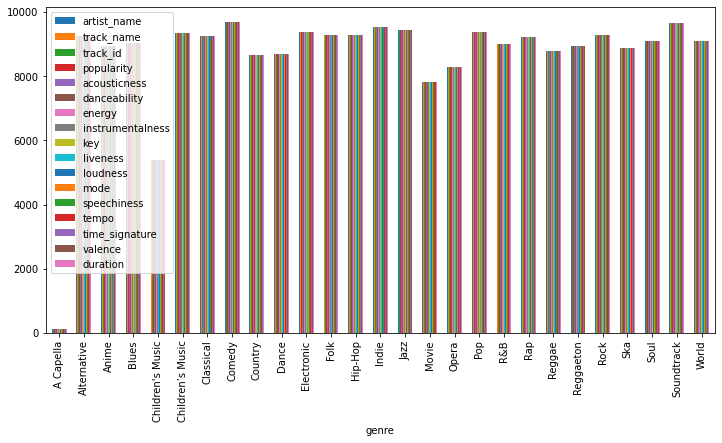

In [109]:
group_by = df.groupby("genre").count()
group_by.plot(kind = "bar",figsize = (12,6), width = 0.6)

In [137]:
df= pd.read_csv("SpotifyFeatures.csv") 

Text(0, 0.5, 'Genres')

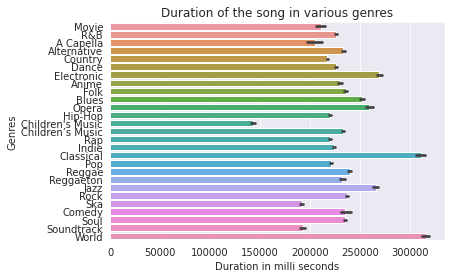

In [138]:
# Duration of the song vs Genres
plt.title("Duration of the song in various genres")
sns.color_palette("magma", as_cmap=True)
sns.barplot(y='genre', x = 'duration_ms', data = df)
plt.xlabel("Duration in milli seconds")
plt.ylabel("Genres")

[Text(0.5, 1.0, 'Top Genres of the list')]

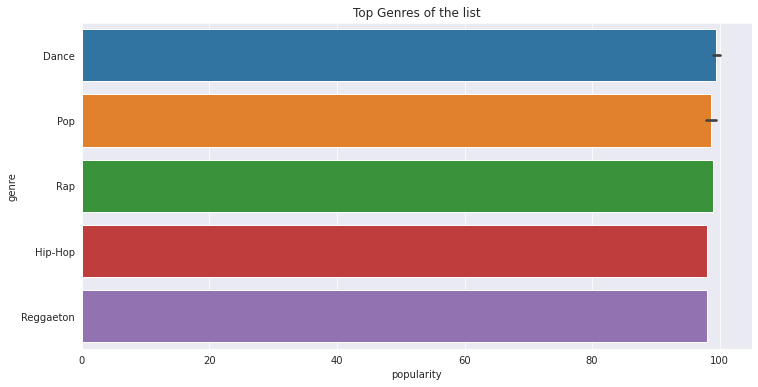

In [140]:
# Top 5 famous Genres
sns.set_style(style = "darkgrid")
plt.figure(figsize = (12,6))
popular = df.sort_values("popularity", ascending = False).head(10)
sns.barplot(y="genre", x= "popularity", data = popular,).set(title="Top Genres of the list")